In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [4]:
%%time
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:60%]', 'train[60%:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

Shuffling and writing examples to C:\Users\Dindar\tensorflow_datasets\cats_vs_dogs\4.0.0.incompleteF3UEFP\cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to C:\Users\Dindar\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.
Wall time: 30min 29s


In [5]:
print(raw_train)
print(raw_validation)
print(raw_test)

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [7]:
type(raw_train)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [8]:
raw_train

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [9]:
for element in raw_train.as_numpy_iterator():
    print(element)


(array([[[242, 248, 248],
        [240, 246, 246],
        [235, 239, 238],
        ...,
        [188, 174, 127],
        [145, 133,  85],
        [161, 149, 101]],

       [[238, 244, 244],
        [239, 245, 245],
        [235, 239, 238],
        ...,
        [188, 176, 128],
        [165, 153, 105],
        [178, 168, 119]],

       [[237, 241, 240],
        [238, 242, 241],
        [232, 236, 235],
        ...,
        [200, 187, 142],
        [201, 191, 142],
        [200, 192, 143]],

       ...,

       [[130, 122,  75],
        [152, 146,  98],
        [154, 148,  98],
        ...,
        [161, 166, 136],
        [ 77,  86,  57],
        [ 71,  82,  52]],

       [[167, 159, 112],
        [105,  99,  51],
        [148, 142,  92],
        ...,
        [ 67,  73,  45],
        [ 46,  56,  29],
        [ 41,  54,  26]],

       [[138, 130,  83],
        [ 83,  77,  29],
        [135, 129,  79],
        ...,
        [ 68,  74,  46],
        [ 14,  27,   1],
        [ 63,  77,  51]

(array([[[ 91,  89, 102],
        [ 38,  38,  46],
        [ 15,  16,  20],
        ...,
        [ 61,  68,  94],
        [ 67,  77, 102],
        [ 68,  79, 101]],

       [[ 92,  89, 100],
        [ 53,  50,  57],
        [ 40,  40,  42],
        ...,
        [ 51,  57,  83],
        [ 57,  64,  90],
        [ 64,  75,  97]],

       [[ 91,  84,  92],
        [ 64,  58,  62],
        [ 59,  55,  54],
        ...,
        [ 69,  70, 100],
        [ 64,  68,  95],
        [ 57,  63,  87]],

       ...,

       [[202, 198, 199],
        [199, 195, 196],
        [195, 191, 192],
        ...,
        [186, 181, 178],
        [190, 185, 182],
        [187, 182, 179]],

       [[199, 195, 196],
        [200, 196, 197],
        [201, 197, 198],
        ...,
        [195, 190, 187],
        [189, 184, 181],
        [189, 183, 183]],

       [[199, 195, 196],
        [200, 196, 197],
        [202, 198, 199],
        ...,
        [195, 190, 187],
        [189, 184, 181],
        [189, 183, 183]

(array([[[114, 117,  88],
        [112, 115,  88],
        [114, 118,  93],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  1,   1,   1]],

       [[114, 117,  88],
        [112, 115,  88],
        [114, 118,  93],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  1,   1,   1]],

       [[115, 118,  89],
        [112, 115,  88],
        [114, 118,  93],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  1,   1,   1]],

       ...,

       [[113, 116,  85],
        [125, 128,  99],
        [121, 124,  97],
        ...,
        [131, 140, 139],
        [131, 140, 139],
        [131, 140, 139]],

       [[115, 118,  87],
        [125, 128,  99],
        [120, 123,  96],
        ...,
        [131, 140, 139],
        [131, 140, 139],
        [131, 140, 139]],

       [[116, 119,  88],
        [126, 129, 100],
        [119, 122,  95],
        ...,
        [132, 141, 140],
        [131, 140, 139],
        [131, 140, 139]

(array([[[ 76, 140,  80],
        [ 71, 135,  75],
        [ 65, 129,  69],
        ...,
        [ 44,  86, 108],
        [ 46,  88, 110],
        [ 48,  90, 112]],

       [[ 74, 138,  78],
        [ 71, 135,  75],
        [ 67, 131,  71],
        ...,
        [ 46,  89, 108],
        [ 48,  90, 112],
        [ 50,  93, 112]],

       [[ 73, 134,  75],
        [ 72, 133,  74],
        [ 71, 132,  73],
        ...,
        [ 49,  90, 108],
        [ 51,  92, 112],
        [ 52,  93, 111]],

       ...,

       [[117, 123, 109],
        [107, 115, 100],
        [101, 112,  96],
        ...,
        [131, 134, 113],
        [130, 133, 114],
        [131, 134, 113]],

       [[106, 112,  98],
        [101, 110,  93],
        [104, 113,  96],
        ...,
        [133, 136, 117],
        [116, 119, 102],
        [100, 103,  84]],

       [[ 94, 101,  85],
        [ 96, 105,  88],
        [113, 122, 105],
        ...,
        [105, 109,  92],
        [110, 114,  99],
        [ 76,  80,  63]

(array([[[ 34,  61,  52],
        [ 31,  59,  47],
        [ 30,  56,  45],
        ...,
        [ 53, 110, 165],
        [ 51, 110, 166],
        [ 51, 110, 166]],

       [[ 35,  61,  52],
        [ 32,  58,  47],
        [ 30,  56,  45],
        ...,
        [ 51, 108, 163],
        [ 49, 108, 164],
        [ 49, 108, 164]],

       [[ 35,  58,  50],
        [ 32,  55,  45],
        [ 31,  54,  44],
        ...,
        [ 49, 106, 161],
        [ 47, 106, 162],
        [ 47, 106, 162]],

       ...,

       [[ 46,  60,  45],
        [ 43,  57,  42],
        [ 29,  46,  30],
        ...,
        [ 53,  85,  72],
        [ 41,  73,  58],
        [ 40,  72,  57]],

       [[ 52,  66,  51],
        [ 51,  65,  50],
        [ 35,  52,  36],
        ...,
        [ 57,  89,  76],
        [ 37,  69,  54],
        [ 32,  64,  49]],

       [[ 62,  76,  61],
        [ 66,  80,  65],
        [ 48,  65,  49],
        ...,
        [ 57,  89,  76],
        [ 31,  63,  48],
        [ 23,  55,  40]

(array([[[145,  92,  50],
        [134,  82,  43],
        [118,  67,  40],
        ...,
        [113, 101,  89],
        [113, 101,  89],
        [105,  93,  81]],

       [[141,  89,  50],
        [131,  78,  44],
        [114,  64,  39],
        ...,
        [118, 106,  94],
        [135, 123, 111],
        [145, 133, 121]],

       [[133,  83,  50],
        [122,  73,  43],
        [107,  59,  37],
        ...,
        [122, 110,  98],
        [124, 112, 100],
        [120, 108,  96]],

       ...,

       [[140, 114,  91],
        [135, 109,  86],
        [130, 104,  81],
        ...,
        [  4,   3,   0],
        [  6,   2,   0],
        [  6,   2,   0]],

       [[136, 110,  87],
        [133, 107,  84],
        [128, 102,  79],
        ...,
        [  4,   3,   0],
        [  6,   2,   0],
        [  7,   3,   0]],

       [[132, 106,  83],
        [130, 104,  81],
        [126, 100,  77],
        ...,
        [  8,   7,   2],
        [ 10,   6,   3],
        [ 11,   7,   4]

        [192, 211, 228]]], dtype=uint8), 1)
(array([[[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [210, 195, 200],
        [213, 198, 203],
        [218, 203, 208]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [212, 197, 202],
        [209, 194, 199],
        [207, 192, 197]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [220, 205, 210],
        [214, 199, 204],
        [208, 193, 198]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 237, 194],
        [254, 237, 194],
        [253, 236, 193]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 237, 194],
        [254, 237, 194],
        [253, 236, 193]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 237, 194],
    

(array([[[72, 85, 94],
        [72, 85, 94],
        [72, 85, 94],
        ...,
        [50, 61, 65],
        [50, 61, 65],
        [48, 59, 63]],

       [[70, 83, 92],
        [70, 83, 92],
        [71, 84, 93],
        ...,
        [49, 60, 64],
        [48, 59, 63],
        [46, 57, 61]],

       [[68, 81, 90],
        [69, 82, 91],
        [70, 83, 92],
        ...,
        [49, 60, 64],
        [48, 59, 63],
        [47, 58, 62]],

       ...,

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [59, 69, 61],
        [57, 67, 59],
        [64, 74, 66]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  1,  0],
        ...,
        [68, 78, 70],
        [62, 72, 64],
        [68, 79, 71]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  1,  0],
        ...,
        [75, 85, 77],
        [68, 78, 70],
        [73, 84, 76]]], dtype=uint8), 1)
(array([[[  0,   1,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...

(array([[[ 22,  21,  17],
        [ 22,  21,  17],
        [ 22,  21,  17],
        ...,
        [191, 208, 216],
        [194, 211, 219],
        [195, 212, 220]],

       [[ 23,  22,  18],
        [ 23,  22,  18],
        [ 23,  22,  18],
        ...,
        [196, 213, 221],
        [199, 216, 224],
        [200, 217, 225]],

       [[ 23,  22,  18],
        [ 23,  22,  18],
        [ 23,  22,  18],
        ...,
        [194, 211, 221],
        [198, 215, 225],
        [199, 216, 226]],

       ...,

       [[ 14,  14,  14],
        [ 22,  22,  22],
        [ 36,  36,  36],
        ...,
        [ 37,  35,  40],
        [ 29,  27,  32],
        [ 25,  23,  28]],

       [[ 14,  14,  14],
        [ 20,  20,  20],
        [ 35,  35,  35],
        ...,
        [ 36,  34,  39],
        [ 27,  25,  30],
        [ 23,  21,  26]],

       [[ 12,  12,  12],
        [ 18,  18,  18],
        [ 33,  33,  33],
        ...,
        [ 34,  33,  38],
        [ 24,  23,  28],
        [ 21,  20,  25]

(array([[[126, 109,  79],
        [122, 105,  75],
        [114,  99,  68],
        ...,
        [137, 121,  85],
        [132, 116,  80],
        [127, 111,  75]],

       [[117, 100,  70],
        [114,  99,  68],
        [111,  96,  65],
        ...,
        [151, 136,  97],
        [148, 133,  94],
        [144, 129,  90]],

       [[115, 100,  71],
        [114, 100,  71],
        [114, 100,  71],
        ...,
        [156, 141, 100],
        [159, 144, 103],
        [161, 146, 105]],

       ...,

       [[181, 166, 135],
        [173, 158, 127],
        [182, 169, 137],
        ...,
        [203, 192, 160],
        [202, 191, 159],
        [201, 190, 158]],

       [[185, 170, 139],
        [168, 153, 122],
        [185, 172, 140],
        ...,
        [201, 188, 156],
        [201, 186, 155],
        [198, 185, 153]],

       [[183, 166, 136],
        [170, 155, 124],
        [201, 188, 156],
        ...,
        [195, 180, 149],
        [196, 179, 149],
        [196, 181, 150]

(array([[[250, 249, 254],
        [251, 251, 251],
        [252, 254, 243],
        ...,
        [238, 246, 205],
        [246, 253, 212],
        [237, 242, 201]],

       [[250, 249, 254],
        [250, 250, 248],
        [251, 252, 244],
        ...,
        [230, 238, 197],
        [246, 253, 212],
        [248, 253, 213]],

       [[250, 250, 252],
        [250, 250, 248],
        [250, 251, 243],
        ...,
        [231, 239, 200],
        [250, 255, 219],
        [253, 255, 221]],

       ...,

       [[181, 205, 173],
        [215, 240, 201],
        [214, 236, 190],
        ...,
        [ 92, 106,  91],
        [ 89, 103,  88],
        [ 89, 101,  89]],

       [[207, 231, 199],
        [229, 254, 215],
        [203, 225, 179],
        ...,
        [ 89, 103,  88],
        [ 86, 100,  85],
        [ 86,  98,  86]],

       [[216, 240, 208],
        [226, 251, 212],
        [199, 221, 175],
        ...,
        [ 88, 102,  87],
        [ 85,  99,  84],
        [ 84,  96,  84]

(array([[[171, 196, 201],
        [172, 195, 201],
        [172, 195, 201],
        ...,
        [179, 198, 205],
        [180, 197, 207],
        [182, 196, 207]],

       [[172, 197, 202],
        [173, 196, 202],
        [173, 196, 202],
        ...,
        [180, 199, 206],
        [182, 199, 207],
        [182, 199, 209]],

       [[174, 199, 204],
        [173, 198, 203],
        [173, 196, 202],
        ...,
        [178, 198, 205],
        [179, 198, 205],
        [180, 199, 206]],

       ...,

       [[162, 189, 198],
        [162, 189, 198],
        [160, 187, 194],
        ...,
        [135, 164, 168],
        [140, 168, 172],
        [141, 166, 170]],

       [[161, 188, 197],
        [162, 189, 198],
        [161, 188, 195],
        ...,
        [141, 164, 170],
        [145, 165, 172],
        [143, 162, 168]],

       [[161, 188, 197],
        [162, 189, 198],
        [162, 189, 196],
        ...,
        [141, 164, 170],
        [145, 165, 172],
        [144, 163, 169]

(array([[[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [ 25,  24,  19],
        [ 32,  31,  26],
        [ 36,  35,  30]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [ 30,  29,  24],
        [ 35,  34,  29],
        [ 39,  38,  33]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [ 37,  36,  31],
        [ 39,  38,  33],
        [ 42,  41,  36]],

       ...,

       [[193, 191, 176],
        [195, 193, 178],
        [197, 195, 180],
        ...,
        [203, 199, 187],
        [202, 198, 186],
        [201, 197, 185]],

       [[199, 197, 182],
        [201, 199, 184],
        [202, 200, 185],
        ...,
        [204, 200, 188],
        [202, 198, 186],
        [201, 197, 185]],

       [[202, 200, 185],
        [204, 202, 187],
        [205, 203, 188],
        ...,
        [204, 200, 188],
        [203, 199, 187],
        [201, 197, 185]

(array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [18, 32, 32],
        [18, 32, 32],
        [18, 32, 32]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [20, 34, 34],
        [20, 34, 34],
        [20, 34, 34]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [23, 37, 38],
        [23, 37, 38],
        [23, 37, 38]],

       ...,

       [[58, 59, 45],
        [57, 58, 44],
        [57, 55, 40],
        ...,
        [74, 57, 37],
        [74, 57, 37],
        [74, 57, 37]],

       [[56, 57, 43],
        [55, 56, 42],
        [55, 53, 38],
        ...,
        [72, 55, 35],
        [72, 55, 35],
        [72, 55, 35]],

       [[54, 55, 41],
        [52, 53, 39],
        [53, 51, 36],
        ...,
        [72, 55, 35],
        [72, 55, 35],
        [72, 55, 35]]], dtype=uint8), 1)
(array([[[10, 82,  0],
        [ 9, 82,  0],
        [ 5, 85,  0],
        ...,
       

(array([[[ 30,  33,  22],
        [ 27,  30,  19],
        [ 24,  27,  16],
        ...,
        [111,  83,  80],
        [112,  84,  81],
        [110,  82,  79]],

       [[ 29,  32,  21],
        [ 26,  29,  18],
        [ 23,  26,  15],
        ...,
        [110,  82,  79],
        [112,  84,  81],
        [110,  85,  81]],

       [[ 29,  32,  21],
        [ 26,  29,  18],
        [ 22,  25,  16],
        ...,
        [ 92,  67,  63],
        [ 96,  70,  69],
        [ 97,  73,  71]],

       ...,

       [[134, 131, 126],
        [131, 128, 123],
        [130, 127, 122],
        ...,
        [148, 144, 145],
        [149, 145, 146],
        [155, 151, 152]],

       [[142, 139, 134],
        [134, 131, 126],
        [128, 125, 120],
        ...,
        [146, 142, 143],
        [153, 149, 150],
        [161, 157, 158]],

       [[136, 133, 128],
        [130, 127, 122],
        [129, 126, 121],
        ...,
        [149, 145, 146],
        [157, 153, 154],
        [162, 158, 159]

        [161, 161, 161]]], dtype=uint8), 0)
(array([[[ 60, 131, 235],
        [ 65, 136, 240],
        [ 67, 140, 242],
        ...,
        [ 75, 159, 245],
        [ 75, 159, 245],
        [ 79, 163, 249]],

       [[ 54, 125, 229],
        [ 57, 130, 233],
        [ 61, 134, 236],
        ...,
        [ 84, 166, 252],
        [ 83, 165, 251],
        [ 87, 169, 255]],

       [[ 65, 138, 241],
        [ 63, 136, 239],
        [ 61, 134, 237],
        ...,
        [ 93, 171, 255],
        [ 94, 172, 255],
        [100, 178, 255]],

       ...,

       [[ 84, 172, 244],
        [ 85, 173, 245],
        [ 86, 172, 245],
        ...,
        [127, 178, 241],
        [126, 176, 239],
        [139, 190, 253]],

       [[ 88, 176, 248],
        [ 91, 179, 251],
        [ 93, 179, 252],
        ...,
        [137, 185, 249],
        [135, 183, 247],
        [143, 191, 255]],

       [[ 94, 182, 253],
        [ 97, 185, 255],
        [ 98, 185, 255],
        ...,
        [144, 189, 254],
    

(array([[[ 94,  46,  10],
        [ 93,  45,   9],
        [ 92,  44,   8],
        ...,
        [160, 168, 157],
        [159, 167, 156],
        [158, 166, 155]],

       [[ 93,  45,   9],
        [ 93,  45,   9],
        [ 92,  44,   8],
        ...,
        [160, 168, 157],
        [159, 167, 156],
        [158, 166, 155]],

       [[ 92,  44,   8],
        [ 93,  45,   9],
        [ 92,  44,   8],
        ...,
        [160, 168, 157],
        [159, 167, 156],
        [158, 166, 155]],

       ...,

       [[133, 116,  98],
        [135, 118,  98],
        [136, 119, 101],
        ...,
        [155, 154, 133],
        [154, 153, 132],
        [153, 152, 131]],

       [[127, 110,  92],
        [129, 112,  94],
        [130, 113,  95],
        ...,
        [155, 154, 133],
        [154, 153, 132],
        [153, 152, 131]],

       [[126, 109,  93],
        [126, 109,  93],
        [127, 111,  95],
        ...,
        [155, 154, 133],
        [154, 153, 132],
        [153, 152, 131]

(array([[[124, 115, 116],
        [126, 117, 118],
        [128, 119, 120],
        ...,
        [ 32,  40,  17],
        [ 33,  38,  18],
        [ 31,  35,  18]],

       [[123, 114, 115],
        [125, 116, 117],
        [127, 118, 119],
        ...,
        [ 32,  40,  17],
        [ 31,  36,  16],
        [ 25,  29,  12]],

       [[123, 114, 115],
        [125, 116, 117],
        [127, 118, 119],
        ...,
        [ 47,  56,  35],
        [ 35,  42,  24],
        [ 23,  30,  12]],

       ...,

       [[137, 118, 103],
        [139, 120, 105],
        [141, 122, 108],
        ...,
        [154, 158, 185],
        [153, 157, 184],
        [159, 163, 190]],

       [[138, 117, 100],
        [137, 118, 103],
        [139, 120, 106],
        ...,
        [166, 173, 189],
        [161, 168, 184],
        [173, 180, 196]],

       [[135, 114,  97],
        [137, 116,  99],
        [137, 118, 104],
        ...,
        [161, 169, 180],
        [154, 162, 173],
        [154, 162, 173]

(array([[[ 29,  79, 138],
        [ 30,  80, 139],
        [ 30,  80, 139],
        ...,
        [ 28,  74, 136],
        [ 28,  74, 136],
        [ 28,  74, 136]],

       [[ 30,  80, 139],
        [ 30,  80, 139],
        [ 30,  80, 139],
        ...,
        [ 29,  75, 137],
        [ 28,  74, 136],
        [ 28,  74, 136]],

       [[ 30,  80, 139],
        [ 30,  80, 139],
        [ 31,  81, 140],
        ...,
        [ 29,  75, 137],
        [ 29,  75, 137],
        [ 29,  75, 137]],

       ...,

       [[137, 148, 154],
        [139, 150, 156],
        [143, 154, 160],
        ...,
        [121, 134, 150],
        [113, 126, 142],
        [111, 124, 140]],

       [[133, 143, 152],
        [135, 146, 152],
        [138, 148, 157],
        ...,
        [114, 127, 143],
        [109, 122, 138],
        [110, 123, 139]],

       [[135, 145, 155],
        [137, 147, 156],
        [139, 149, 159],
        ...,
        [115, 128, 144],
        [114, 127, 143],
        [120, 133, 149]

(array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]

(array([[[ 81,  26,  29],
        [ 84,  32,  34],
        [ 83,  33,  34],
        ...,
        [ 53,  43,  31],
        [ 50,  40,  28],
        [ 50,  41,  26]],

       [[ 85,  29,  32],
        [ 88,  33,  36],
        [ 84,  32,  34],
        ...,
        [ 50,  40,  28],
        [ 47,  37,  25],
        [ 48,  39,  24]],

       [[ 93,  32,  39],
        [ 95,  36,  42],
        [ 89,  34,  39],
        ...,
        [ 40,  30,  18],
        [ 42,  32,  20],
        [ 46,  37,  22]],

       ...,

       [[158, 170, 160],
        [158, 170, 160],
        [159, 171, 161],
        ...,
        [ 78,  83,  76],
        [ 69,  74,  67],
        [ 68,  71,  64]],

       [[161, 173, 163],
        [160, 172, 162],
        [159, 171, 161],
        ...,
        [ 79,  84,  77],
        [ 68,  73,  66],
        [ 65,  68,  61]],

       [[161, 173, 163],
        [160, 172, 162],
        [158, 170, 160],
        ...,
        [ 77,  82,  75],
        [ 67,  72,  65],
        [ 64,  67,  60]

(array([[[ 95, 104, 103],
        [106, 115, 114],
        [109, 118, 117],
        ...,
        [155, 152, 111],
        [157, 154, 111],
        [169, 166, 123]],

       [[ 99, 108, 107],
        [107, 116, 115],
        [108, 117, 116],
        ...,
        [163, 162, 118],
        [161, 160, 116],
        [162, 161, 115]],

       [[102, 112, 111],
        [106, 116, 115],
        [106, 115, 114],
        ...,
        [157, 161, 111],
        [153, 157, 107],
        [144, 148,  98]],

       ...,

       [[ 76, 107,  40],
        [ 77, 107,  43],
        [ 85, 114,  58],
        ...,
        [ 78,  97,  77],
        [ 69,  86,  67],
        [ 71,  90,  70]],

       [[ 74, 105,  35],
        [ 73, 104,  37],
        [ 84, 113,  55],
        ...,
        [ 89, 106,  87],
        [ 76,  91,  72],
        [ 70,  87,  68]],

       [[ 73, 107,  30],
        [ 70, 103,  32],
        [ 81, 113,  50],
        ...,
        [ 96, 111,  90],
        [ 79,  92,  72],
        [ 67,  82,  61]

(array([[[187, 185, 172],
        [186, 184, 171],
        [186, 184, 171],
        ...,
        [143, 130,  95],
        [143, 130,  95],
        [143, 130,  95]],

       [[187, 185, 172],
        [186, 184, 171],
        [186, 184, 171],
        ...,
        [143, 130,  95],
        [143, 130,  95],
        [143, 130,  95]],

       [[187, 185, 172],
        [186, 184, 171],
        [186, 184, 171],
        ...,
        [143, 130,  95],
        [143, 130,  95],
        [143, 130,  95]],

       ...,

       [[ 33,  49,  48],
        [ 38,  42,  41],
        [ 61,  41,  40],
        ...,
        [167, 151, 126],
        [168, 152, 127],
        [168, 152, 127]],

       [[ 22,  54,  53],
        [ 22,  40,  40],
        [ 40,  31,  32],
        ...,
        [171, 153, 129],
        [171, 153, 129],
        [172, 154, 130]],

       [[ 16,  56,  56],
        [ 13,  39,  40],
        [ 27,  25,  28],
        ...,
        [175, 155, 131],
        [175, 155, 131],
        [176, 156, 132]

(array([[[11,  5,  5],
        [11,  5,  5],
        [12,  7,  4],
        ...,
        [59, 84, 88],
        [58, 83, 87],
        [57, 82, 86]],

       [[10,  4,  4],
        [11,  5,  5],
        [12,  7,  4],
        ...,
        [61, 86, 90],
        [60, 85, 89],
        [59, 84, 88]],

       [[10,  6,  5],
        [10,  6,  5],
        [11,  7,  4],
        ...,
        [63, 88, 92],
        [62, 87, 91],
        [61, 86, 90]],

       ...,

       [[41, 38, 19],
        [42, 39, 20],
        [45, 42, 23],
        ...,
        [61, 42, 27],
        [61, 42, 27],
        [61, 42, 27]],

       [[40, 37, 18],
        [43, 40, 21],
        [46, 43, 24],
        ...,
        [61, 42, 27],
        [61, 42, 27],
        [61, 42, 27]],

       [[41, 38, 19],
        [43, 40, 21],
        [47, 44, 25],
        ...,
        [61, 42, 27],
        [61, 42, 27],
        [61, 42, 27]]], dtype=uint8), 1)
(array([[[  6,   4,   0],
        [  1,   1,   0],
        [  1,   0,   0],
        ...

(array([[[128, 132, 105],
        [135, 139, 112],
        [120, 124,  99],
        ...,
        [104, 117,  87],
        [106, 119,  89],
        [104, 117,  87]],

       [[129, 133, 106],
        [124, 128, 101],
        [106, 110,  85],
        ...,
        [112, 126,  91],
        [107, 121,  86],
        [ 97, 111,  76]],

       [[141, 146, 116],
        [133, 138, 108],
        [124, 128, 101],
        ...,
        [108, 123,  82],
        [104, 119,  78],
        [ 96, 111,  70]],

       ...,

       [[ 70,  87,  45],
        [ 81,  98,  54],
        [ 84, 104,  55],
        ...,
        [141, 155, 104],
        [125, 139,  88],
        [113, 127,  76]],

       [[ 64,  79,  46],
        [ 73,  89,  53],
        [ 84, 100,  61],
        ...,
        [135, 147,  97],
        [120, 132,  82],
        [112, 124,  74]],

       [[ 63,  78,  49],
        [ 58,  73,  42],
        [ 67,  83,  46],
        ...,
        [126, 138,  88],
        [101, 113,  63],
        [ 86,  98,  48]

(array([[[ 23,  26,  31],
        [ 23,  26,  31],
        [ 24,  27,  32],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[ 23,  26,  31],
        [ 23,  26,  31],
        [ 24,  27,  32],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[ 23,  26,  31],
        [ 24,  27,  32],
        [ 25,  28,  33],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       ...,

       [[ 93, 112, 106],
        [ 81, 100,  94],
        [ 58,  77,  71],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[ 89, 108, 102],
        [ 78,  97,  91],
        [ 62,  81,  75],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[ 79,  98,  92],
        [ 75,  94,  88],
        [ 72,  91,  85],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]

(array([[[ 68,  96, 135],
        [ 64,  92, 131],
        [ 61,  89, 126],
        ...,
        [231, 237, 235],
        [231, 237, 235],
        [231, 237, 235]],

       [[ 67,  95, 134],
        [ 65,  93, 132],
        [ 65,  93, 130],
        ...,
        [231, 237, 235],
        [231, 237, 235],
        [231, 237, 235]],

       [[ 64,  92, 129],
        [ 66,  94, 131],
        [ 69,  97, 134],
        ...,
        [231, 237, 235],
        [231, 237, 235],
        [231, 237, 235]],

       ...,

       [[254, 255, 247],
        [254, 255, 247],
        [254, 255, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 255, 247],
        [254, 255, 247],
        [254, 255, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 255, 247],
        [254, 255, 247],
        [254, 255, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]

(array([[[129, 104,  64],
        [159, 134,  94],
        [132, 104,  65],
        ...,
        [165, 135,  81],
        [165, 135,  83],
        [168, 138,  86]],

       [[147, 122,  82],
        [163, 138,  98],
        [156, 128,  89],
        ...,
        [156, 128,  78],
        [161, 131,  81],
        [176, 148,  98]],

       [[192, 164, 124],
        [181, 153, 113],
        [173, 145, 105],
        ...,
        [176, 149, 102],
        [171, 142,  98],
        [173, 146, 101]],

       ...,

       [[ 50,  43,  61],
        [ 55,  47,  62],
        [174, 164, 172],
        ...,
        [ 48,  46,  49],
        [ 51,  49,  52],
        [ 48,  46,  49]],

       [[ 23,  17,  31],
        [ 56,  48,  61],
        [ 59,  49,  60],
        ...,
        [ 54,  52,  55],
        [ 55,  53,  56],
        [ 49,  47,  50]],

       [[ 36,  33,  42],
        [ 50,  44,  56],
        [ 64,  53,  69],
        ...,
        [ 54,  52,  55],
        [ 55,  53,  56],
        [ 48,  46,  49]

(array([[[ 85,  75,  48],
        [ 87,  77,  50],
        [ 90,  80,  53],
        ...,
        [240, 240, 240],
        [245, 245, 245],
        [249, 249, 249]],

       [[ 86,  76,  49],
        [ 88,  78,  51],
        [ 91,  81,  54],
        ...,
        [240, 240, 240],
        [243, 243, 243],
        [246, 246, 246]],

       [[ 88,  78,  51],
        [ 90,  80,  53],
        [ 93,  83,  56],
        ...,
        [239, 239, 239],
        [240, 240, 240],
        [240, 240, 240]],

       ...,

       [[204, 192, 180],
        [204, 192, 180],
        [204, 192, 180],
        ...,
        [157, 135,  98],
        [155, 133,  96],
        [154, 132,  95]],

       [[204, 192, 180],
        [204, 192, 180],
        [204, 192, 180],
        ...,
        [157, 135,  98],
        [155, 133,  96],
        [154, 132,  95]],

       [[204, 192, 180],
        [204, 192, 180],
        [204, 192, 180],
        ...,
        [157, 135,  98],
        [155, 133,  96],
        [154, 132,  95]

(array([[[ 14,  21,  29],
        [ 14,  21,  29],
        [ 13,  20,  28],
        ...,
        [242, 247, 241],
        [243, 248, 244],
        [245, 249, 248]],

       [[ 14,  21,  29],
        [ 14,  21,  29],
        [ 14,  21,  29],
        ...,
        [242, 247, 241],
        [243, 248, 244],
        [244, 248, 247]],

       [[ 14,  21,  29],
        [ 14,  21,  29],
        [ 14,  21,  29],
        ...,
        [242, 247, 241],
        [243, 248, 244],
        [244, 248, 247]],

       ...,

       [[ 17,  24,  34],
        [ 15,  22,  32],
        [ 14,  21,  31],
        ...,
        [123, 103,  96],
        [123, 103,  96],
        [119,  99,  90]],

       [[ 17,  24,  34],
        [ 15,  22,  32],
        [ 14,  21,  31],
        ...,
        [123, 103,  96],
        [123, 103,  96],
        [121, 101,  92]],

       [[ 17,  24,  34],
        [ 15,  22,  32],
        [ 14,  21,  31],
        ...,
        [123, 103,  96],
        [123, 103,  96],
        [122, 102,  93]

(array([[[206, 225, 229],
        [205, 224, 228],
        [205, 224, 228],
        ...,
        [ 87, 142, 199],
        [100, 152, 212],
        [ 92, 142, 205]],

       [[206, 225, 229],
        [206, 225, 229],
        [205, 224, 228],
        ...,
        [ 87, 142, 199],
        [ 90, 142, 202],
        [ 81, 131, 194]],

       [[206, 225, 229],
        [206, 225, 229],
        [206, 225, 229],
        ...,
        [ 89, 144, 201],
        [ 87, 139, 199],
        [ 83, 133, 196]],

       ...,

       [[ 74,  79,  98],
        [ 82,  90, 109],
        [ 82,  93, 113],
        ...,
        [ 75,  83, 104],
        [ 63,  71,  92],
        [ 63,  71,  92]],

       [[ 74,  79,  98],
        [ 82,  90, 109],
        [ 83,  94, 114],
        ...,
        [ 76,  84, 105],
        [ 65,  73,  94],
        [ 61,  69,  90]],

       [[ 71,  76,  95],
        [ 78,  86, 105],
        [ 76,  87, 107],
        ...,
        [ 68,  76,  97],
        [ 66,  74,  95],
        [ 63,  71,  92]

(array([[[ 77,  87,  79],
        [ 80,  90,  82],
        [ 81,  91,  83],
        ...,
        [211,  15,  39],
        [215,  17,  40],
        [212,  15,  35]],

       [[ 82,  92,  84],
        [ 84,  94,  86],
        [ 84,  94,  86],
        ...,
        [213,  13,  41],
        [215,  15,  43],
        [215,  12,  41]],

       [[ 88,  95,  88],
        [ 90,  97,  90],
        [ 89,  99,  91],
        ...,
        [216,  16,  44],
        [217,  17,  45],
        [217,  17,  45]],

       ...,

       [[ 28,  17,  13],
        [ 29,  18,  14],
        [ 33,  19,  16],
        ...,
        [ 31,   0,   0],
        [ 32,   0,   1],
        [ 31,   0,   0]],

       [[ 29,  18,  12],
        [ 29,  18,  12],
        [ 29,  18,  12],
        ...,
        [ 39,   0,   0],
        [ 33,   2,   0],
        [ 28,   0,   0]],

       [[ 29,  20,  13],
        [ 28,  19,  12],
        [ 28,  18,   9],
        ...,
        [ 49,   0,   0],
        [ 32,   1,   0],
        [ 24,   0,   0]

(array([[[129, 134, 138],
        [104, 108, 111],
        [ 68,  69,  71],
        ...,
        [228, 224, 189],
        [222, 213, 180],
        [222, 214, 178]],

       [[109, 113, 116],
        [ 90,  91,  93],
        [ 61,  61,  61],
        ...,
        [120, 118,  95],
        [150, 146, 121],
        [180, 176, 149]],

       [[126, 126, 124],
        [ 99,  98,  94],
        [ 71,  68,  63],
        ...,
        [ 37,  39,  34],
        [ 48,  51,  44],
        [ 58,  61,  54]],

       ...,

       [[ 34, 110, 159],
        [ 26, 100, 147],
        [ 30, 103, 146],
        ...,
        [ 23, 101, 149],
        [ 21, 101, 150],
        [ 31, 111, 160]],

       [[ 34, 112, 158],
        [ 26, 103, 145],
        [ 32, 104, 144],
        ...,
        [ 23, 101, 149],
        [ 19,  99, 148],
        [ 28, 108, 159]],

       [[ 40, 121, 164],
        [ 35, 113, 152],
        [ 42, 111, 150],
        ...,
        [ 33, 111, 159],
        [ 26, 106, 157],
        [ 32, 112, 163]

(array([[[12, 12, 12],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [14, 14, 14]],

       [[12, 12, 12],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [17, 17, 17],
        [15, 15, 15],
        [14, 14, 14]],

       [[12, 12, 12],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [17, 17, 17],
        [15, 15, 15],
        [15, 15, 15]],

       ...,

       [[ 4,  6,  1],
        [ 1,  2,  0],
        [ 3,  0,  0],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [18, 18, 18]],

       [[ 1,  6,  2],
        [ 0,  2,  0],
        [ 0,  1,  0],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [18, 18, 18]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 1,  3,  0],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [19, 19, 19]]], dtype=uint8), 0)
(array([[[ 75,  75,  67],
        [ 76,  76,  68],
        [ 76,  76,  68],
        ...

        [118, 100,  98]]], dtype=uint8), 1)
(array([[[238, 185, 179],
        [237, 187, 180],
        [240, 190, 181],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[237, 182, 177],
        [239, 186, 180],
        [242, 192, 183],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[237, 179, 175],
        [241, 183, 179],
        [246, 191, 184],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[241,  42,  75],
        [238,  40,  73],
        [231,  38,  69],
        ...,
        [240, 238, 243],
        [240, 238, 243],
        [240, 238, 243]],

       [[243,  44,  77],
        [237,  39,  72],
        [227,  34,  65],
        ...,
        [240, 238, 243],
        [240, 238, 243],
        [240, 238, 243]],

       [[244,  45,  78],
        [236,  38,  71],
        [224,  31,  62],
        ...,
        [240, 238, 243],
    

(array([[[ 75,  79,  46],
        [ 83,  87,  54],
        [ 91,  95,  62],
        ...,
        [181, 175, 159],
        [181, 175, 159],
        [181, 175, 159]],

       [[ 80,  84,  51],
        [ 88,  92,  59],
        [ 96, 100,  67],
        ...,
        [182, 176, 160],
        [182, 176, 160],
        [182, 176, 160]],

       [[ 75,  78,  47],
        [ 82,  85,  54],
        [ 92,  95,  64],
        ...,
        [182, 176, 160],
        [182, 176, 160],
        [182, 176, 160]],

       ...,

       [[110, 131, 148],
        [112, 133, 150],
        [115, 136, 153],
        ...,
        [ 75,  84,  89],
        [ 75,  86,  90],
        [ 75,  86,  90]],

       [[110, 131, 148],
        [113, 134, 151],
        [115, 136, 153],
        ...,
        [ 44,  52,  55],
        [ 43,  53,  55],
        [ 43,  53,  55]],

       [[110, 131, 148],
        [113, 134, 151],
        [115, 136, 153],
        ...,
        [ 75,  83,  86],
        [ 74,  84,  86],
        [ 73,  83,  85]

(array([[[ 40,  39,  37],
        [ 34,  33,  31],
        [ 36,  35,  31],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       [[ 34,  33,  31],
        [ 30,  29,  27],
        [ 34,  33,  29],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       [[ 32,  31,  29],
        [ 31,  30,  28],
        [ 35,  34,  30],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       ...,

       [[216, 215, 211],
        [217, 216, 212],
        [218, 217, 213],
        ...,
        [190, 188, 191],
        [189, 187, 190],
        [189, 187, 190]],

       [[217, 216, 212],
        [218, 217, 213],
        [218, 217, 213],
        ...,
        [188, 186, 189],
        [187, 185, 188],
        [186, 184, 187]],

       [[217, 216, 212],
        [218, 217, 213],
        [219, 218, 214],
        ...,
        [187, 185, 188],
        [187, 185, 188],
        [186, 184, 187]

(array([[[ 70,  80,  81],
        [ 80,  90,  91],
        [ 66,  76,  77],
        ...,
        [ 33,  41,  30],
        [ 11,  20,   3],
        [ 56,  65,  48]],

       [[ 78,  88,  89],
        [ 69,  79,  80],
        [ 52,  62,  63],
        ...,
        [ 35,  43,  32],
        [ 11,  19,   4],
        [ 54,  63,  46]],

       [[ 83,  93,  94],
        [ 59,  69,  70],
        [ 44,  54,  55],
        ...,
        [ 39,  46,  38],
        [ 11,  19,   4],
        [ 51,  60,  43]],

       ...,

       [[100, 104, 103],
        [ 99, 103, 102],
        [ 87,  91,  90],
        ...,
        [ 24,  35,  31],
        [ 28,  36,  25],
        [ 67,  75,  64]],

       [[ 90,  94,  93],
        [ 73,  77,  76],
        [ 89,  93,  92],
        ...,
        [ 22,  33,  29],
        [ 20,  30,  19],
        [ 58,  68,  57]],

       [[ 78,  82,  81],
        [ 57,  61,  60],
        [ 89,  93,  92],
        ...,
        [ 16,  27,  23],
        [ 11,  21,  10],
        [ 47,  57,  46]

(array([[[217, 127, 101],
        [209, 122,  95],
        [201, 117,  91],
        ...,
        [146,  96,  71],
        [145,  95,  70],
        [144,  94,  69]],

       [[215, 125,  99],
        [208, 121,  94],
        [201, 117,  91],
        ...,
        [146,  96,  73],
        [145,  95,  72],
        [145,  95,  72]],

       [[212, 122,  98],
        [207, 119,  95],
        [202, 118,  94],
        ...,
        [146,  95,  76],
        [146,  95,  76],
        [145,  94,  75]],

       ...,

       [[181, 133, 131],
        [177, 129, 127],
        [156, 111, 108],
        ...,
        [189, 150, 145],
        [189, 150, 145],
        [189, 150, 145]],

       [[171, 123, 121],
        [169, 121, 119],
        [150, 105, 102],
        ...,
        [192, 153, 148],
        [192, 153, 148],
        [191, 152, 147]],

       [[169, 121, 119],
        [167, 119, 117],
        [147, 102,  99],
        ...,
        [187, 148, 143],
        [188, 149, 144],
        [188, 149, 144]

(array([[[ 98,  99,  83],
        [101, 102,  88],
        [ 98,  99,  91],
        ...,
        [158, 124,  86],
        [160, 126,  88],
        [162, 128,  90]],

       [[115, 113,  98],
        [109, 107,  94],
        [ 92,  92,  82],
        ...,
        [134, 100,  62],
        [136, 102,  64],
        [137, 103,  65]],

       [[161, 154, 138],
        [169, 163, 149],
        [181, 177, 166],
        ...,
        [154, 120,  82],
        [156, 122,  84],
        [158, 124,  86]],

       ...,

       [[ 47,  36,  30],
        [ 45,  34,  28],
        [ 41,  30,  24],
        ...,
        [134, 101,  82],
        [132,  99,  80],
        [131,  98,  79]],

       [[ 46,  35,  29],
        [ 42,  31,  25],
        [ 35,  24,  18],
        ...,
        [124,  91,  72],
        [128,  95,  76],
        [130,  97,  78]],

       [[ 40,  29,  23],
        [ 40,  29,  23],
        [ 38,  27,  21],
        ...,
        [120,  87,  68],
        [127,  94,  75],
        [132,  99,  80]

(array([[[148, 143, 166],
        [147, 142, 165],
        [161, 156, 179],
        ...,
        [175, 165, 189],
        [169, 159, 183],
        [163, 153, 177]],

       [[148, 143, 166],
        [149, 144, 167],
        [154, 149, 172],
        ...,
        [169, 157, 181],
        [161, 151, 175],
        [156, 146, 170]],

       [[149, 144, 167],
        [151, 146, 169],
        [149, 144, 167],
        ...,
        [181, 167, 192],
        [174, 162, 186],
        [170, 158, 182]],

       ...,

       [[ 32,  42,  34],
        [ 33,  43,  35],
        [ 35,  42,  35],
        ...,
        [ 43,  48,  44],
        [ 34,  39,  33],
        [ 28,  33,  26]],

       [[ 43,  55,  45],
        [ 46,  56,  47],
        [ 52,  59,  52],
        ...,
        [ 40,  45,  41],
        [ 31,  36,  30],
        [ 27,  34,  26]],

       [[ 49,  61,  51],
        [ 55,  65,  56],
        [ 64,  71,  64],
        ...,
        [ 39,  43,  42],
        [ 30,  35,  29],
        [ 27,  34,  27]

(array([[[ 25,  54,  36],
        [ 11,  41,  29],
        [  1,  32,  34],
        ...,
        [107,  87,  76],
        [ 62,  42,  35],
        [ 48,  27,  22]],

       [[ 18,  41,  25],
        [ 20,  46,  35],
        [  7,  35,  36],
        ...,
        [128, 110,  98],
        [ 51,  32,  25],
        [ 35,  16,  10]],

       [[ 11,  23,   9],
        [ 19,  35,  25],
        [  9,  28,  32],
        ...,
        [ 82,  70,  58],
        [ 52,  39,  31],
        [ 47,  34,  28]],

       ...,

       [[ 78,  59,  44],
        [131, 114,  88],
        [155, 141,  96],
        ...,
        [ 33,  95, 168],
        [ 28,  94, 168],
        [ 30,  98, 173]],

       [[134, 113,  86],
        [153, 134, 101],
        [149, 135,  88],
        ...,
        [ 22,  85, 164],
        [ 16,  79, 158],
        [ 19,  85, 163]],

       [[155, 133,  92],
        [164, 145, 102],
        [150, 133,  87],
        ...,
        [ 12,  75, 154],
        [ 17,  76, 154],
        [ 10,  69, 145]

(array([[[ 96,  47,  33],
        [ 93,  45,  31],
        [ 96,  48,  36],
        ...,
        [ 85,  58,  41],
        [ 85,  58,  41],
        [ 85,  58,  41]],

       [[ 96,  47,  33],
        [ 93,  45,  31],
        [ 95,  49,  36],
        ...,
        [ 86,  59,  42],
        [ 86,  59,  42],
        [ 85,  58,  41]],

       [[ 96,  49,  33],
        [ 94,  46,  32],
        [ 95,  49,  36],
        ...,
        [ 88,  61,  44],
        [ 87,  60,  43],
        [ 85,  58,  41]],

       ...,

       [[117, 103,  92],
        [118, 104,  93],
        [121, 107,  98],
        ...,
        [178, 177, 185],
        [175, 174, 182],
        [173, 172, 180]],

       [[120, 106,  95],
        [120, 106,  95],
        [121, 107,  98],
        ...,
        [172, 171, 179],
        [169, 168, 176],
        [167, 166, 174]],

       [[119, 105,  94],
        [117, 103,  92],
        [118, 104,  95],
        ...,
        [173, 172, 180],
        [166, 165, 173],
        [162, 161, 169]

KeyboardInterrupt: 

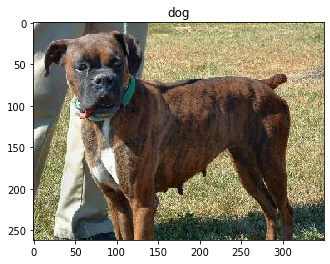

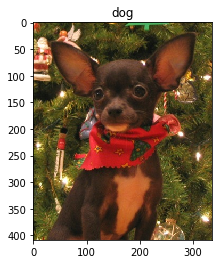

In [6]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [10]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [11]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [28]:
train

<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>

In [12]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000


In [13]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [30]:
test_batches

<BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int64)>

In [14]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [29]:
image_batch

<tf.Tensor: shape=(32, 160, 160, 3), dtype=float32, numpy=
array([[[[-0.2487362 , -0.45298713, -0.7015625 ],
         [-0.34633118, -0.4500153 , -0.6098346 ],
         [-0.3501991 , -0.4955423 , -0.68337166],
         ...,
         [-0.42065716, -0.45987284, -0.48340225],
         [-0.40943626, -0.44865194, -0.47218135],
         [-0.4215686 , -0.4607843 , -0.48431373]],

        [[-0.17218137, -0.3106541 , -0.46543348],
         [-0.3631893 , -0.39270067, -0.47534466],
         [-0.39091605, -0.46546414, -0.5742111 ],
         ...,
         [-0.4278569 , -0.46707258, -0.490602  ],
         [-0.4285769 , -0.46779257, -0.49132198],
         [-0.41923252, -0.4584482 , -0.4819776 ]],

        [[-0.3705346 , -0.48419115, -0.584015  ],
         [-0.5057598 , -0.5195313 , -0.5329274 ],
         [-0.48943016, -0.5324219 , -0.5795037 ],
         ...,
         [-0.42103246, -0.46024814, -0.48377755],
         [-0.39963233, -0.43884802, -0.46237743],
         [-0.38517153, -0.42438722, -0.447916

In [15]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 70s 7us/step


In [16]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [17]:
base_model.trainable = False

In [18]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [20]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [21]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
len(model.trainable_variables)

2

In [25]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 5s 256ms/step - loss: 0.7624 - accuracy: 0.5016


In [26]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10
437/437 [==============================] - 39s 89ms/step - loss: 0.4345 - accuracy: 0.8051 - val_loss: 0.1788 - val_accuracy: 0.9377
Epoch 2/10
437/437 [==============================] - 34s 79ms/step - loss: 0.2249 - accuracy: 0.9229 - val_loss: 0.1381 - val_accuracy: 0.9473
Epoch 3/10
437/437 [==============================] - 35s 79ms/step - loss: 0.1805 - accuracy: 0.9354 - val_loss: 0.1150 - val_accuracy: 0.9562
Epoch 4/10
437/437 [==============================] - 35s 79ms/step - loss: 0.1601 - accuracy: 0.9402 - val_loss: 0.1141 - val_accuracy: 0.9553
Epoch 5/10
437/437 [==============================] - 35s 79ms/step - loss: 0.1477 - accuracy: 0.9434 - val_loss: 0.1105 - val_accuracy: 0.9568
Epoch 6/10
437/437 [==============================] - 35s 79ms/step - loss: 0.1384 - accuracy: 0.9476 - val_loss: 0.1056 - val_accuracy: 0.9590
Epoch 7/10
437/437 [==============================] - 35s 80ms/step - loss: 0.1366 - accuracy: 0.9493 - val_loss: 0.0966 - val_accuracy:

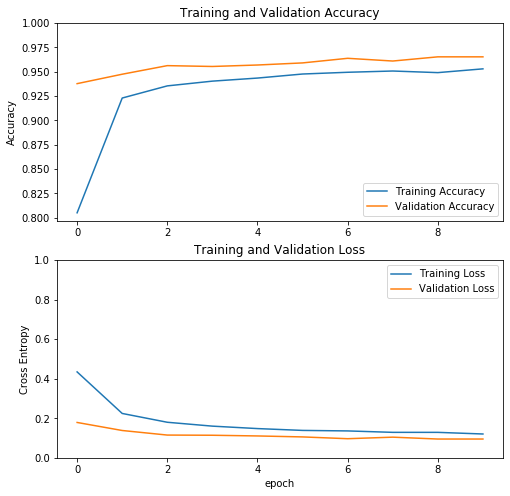

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()